# Importation des packages

In [56]:
import pandas as pd # Importation du package pandas 
import matplotlib.pyplot as plt  #Importation du package matplotlib.pyplot
import numpy as np  # Importation du package numpy
from sklearn.linear_model import SGDRegressor  # Importation SGDRegressor à partir de la bibliothèque sklearn.linear_model 
import seaborn as sns #Importation du package seaborn
from sklearn.neighbors import KNeighborsClassifier #Importation KNeighborsClassifier à partir de la bibliothèque sklearn.neighbors 
from sklearn.metrics import confusion_matrix #Importation confusion_matrix à partir de la bibliothèque sklearn.metrics
from sklearn.metrics import accuracy_score #Importation accuracy_score à partir de la bibliothèque sklearn.metrics
from sklearn.model_selection import train_test_split #Importation train_test_split à partir de la bibliothèque sklearn.model_selection  

# lecture de la bdd

In [57]:
data = pd.read_csv('Social_Network_Ads.csv') # Lecture des données à partir d’un fichier
data    #Appeler data pour l’afficher

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# dimensions

In [58]:
data.shape  #Dimensions du dataset

(400, 5)

# Colonnes

In [59]:
data.columns  # Afficher les colonnes

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

# Afficher les 5premières ligne du dataframe

In [60]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# description de dataset

In [61]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


# verification si la personne achete ou non ?

In [62]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

# Combien de mâles et de femmes avons-nous ?

In [63]:
data['Gender'].value_counts() 

Female    204
Male      196
Name: Gender, dtype: int64

# un cercle graphique qui représente le pourcentage des Genres

<function matplotlib.pyplot.legend(*args, **kwargs)>

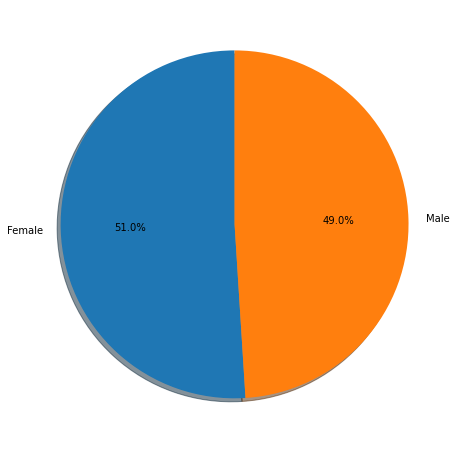

In [64]:
plt.figure(figsize =(12,8))
a=['Female','Male']
b=[204,196]
plt.pie(b,labels=a,shadow =True,autopct='%1.1f%%', startangle =90)
plt.legend

# un histogramme des âges

<AxesSubplot:title={'center':"Un histogramme représente le nombre d'âges des personnes"}, xlabel='Age', ylabel='Count'>

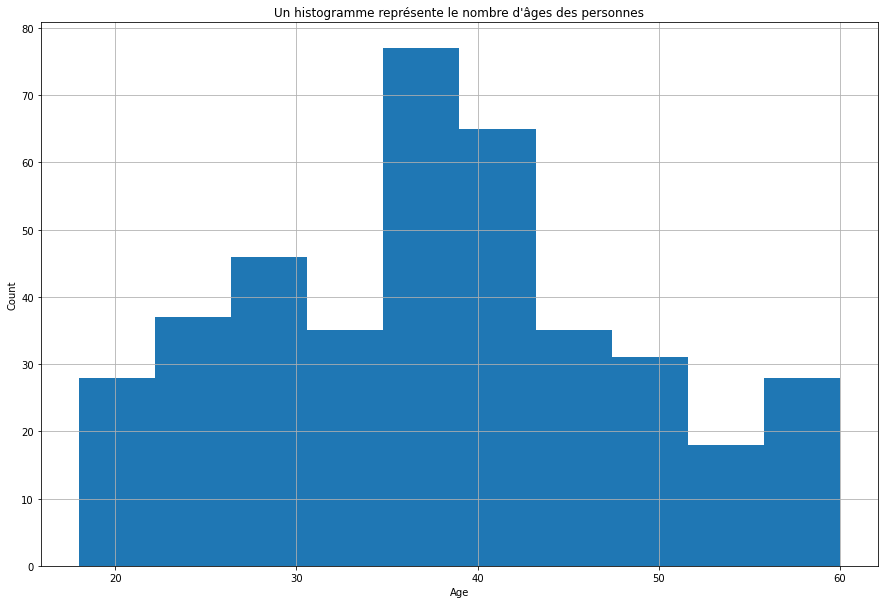

In [65]:
plt.figure(figsize=(15, 10))
plt.title("Un histogramme représente le nombre d'âges des personnes") 
plt.xlabel('Age')
plt.ylabel('Count')
data['Age'].hist()

# un histogramme des Salaire Estimé

<AxesSubplot:title={'center':'Un histogramme représente le nombre des salaire estimé'}, xlabel='Estimated Salary', ylabel='Count'>

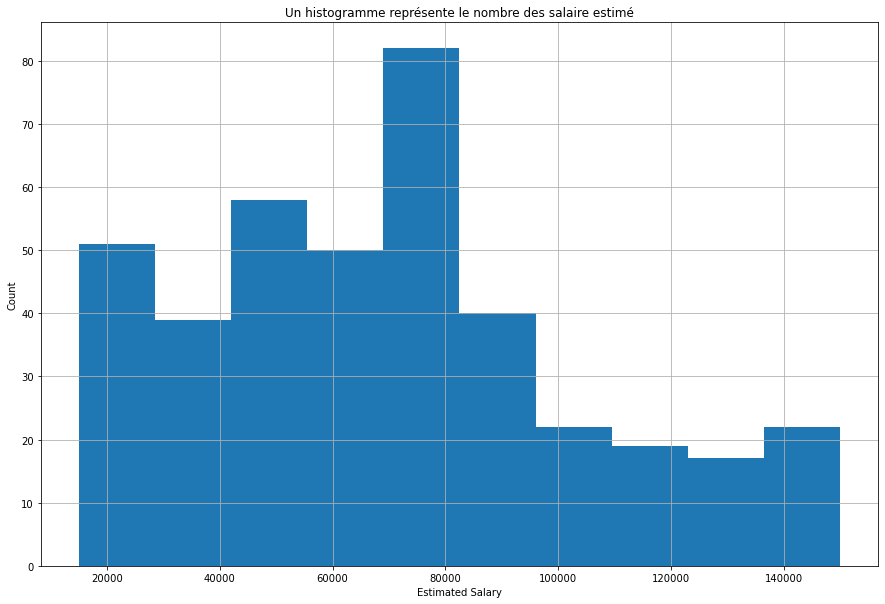

In [66]:
plt.figure(figsize=(15, 10))
plt.title("Un histogramme représente le nombre des salaire estimé") 
plt.xlabel('Estimated Salary')
plt.ylabel('Count')
data['EstimatedSalary'].hist()

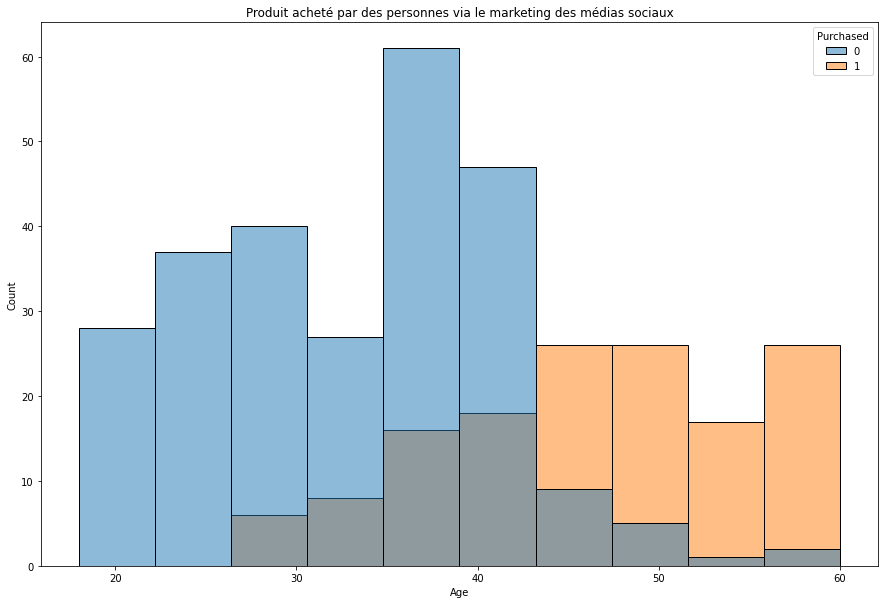

In [67]:
plt.figure(figsize=(15, 10))
plt.title('Produit acheté par des personnes via le marketing des médias sociaux')
sns.histplot(x='Age', hue='Purchased', data=data)
plt.show()

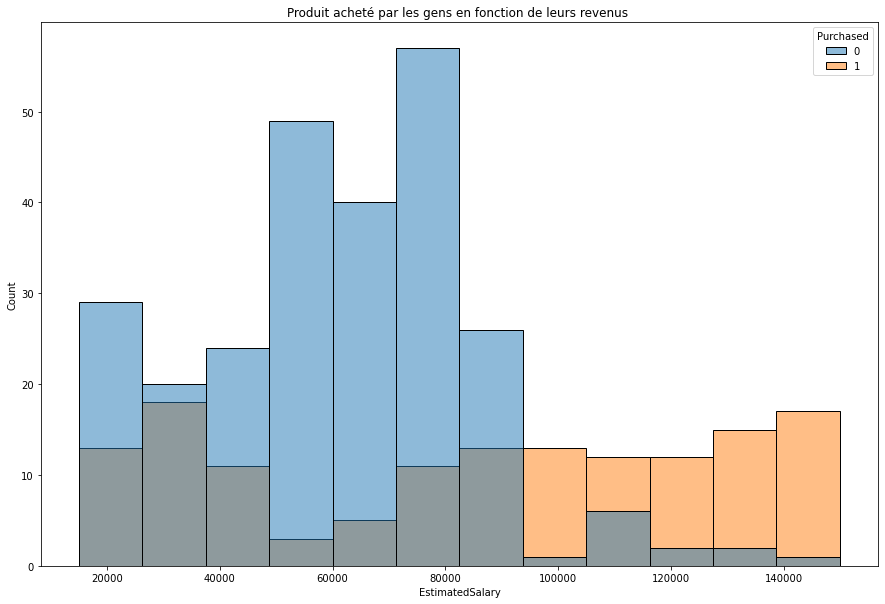

In [68]:
plt.figure(figsize=(15, 10))
plt.title('Produit acheté par les gens en fonction de leurs revenus ')
sns.histplot(x='EstimatedSalary', hue='Purchased', data=data)
plt.show()

# La Nuage de point en fonction des deux attributs Age et EstimatedSalary

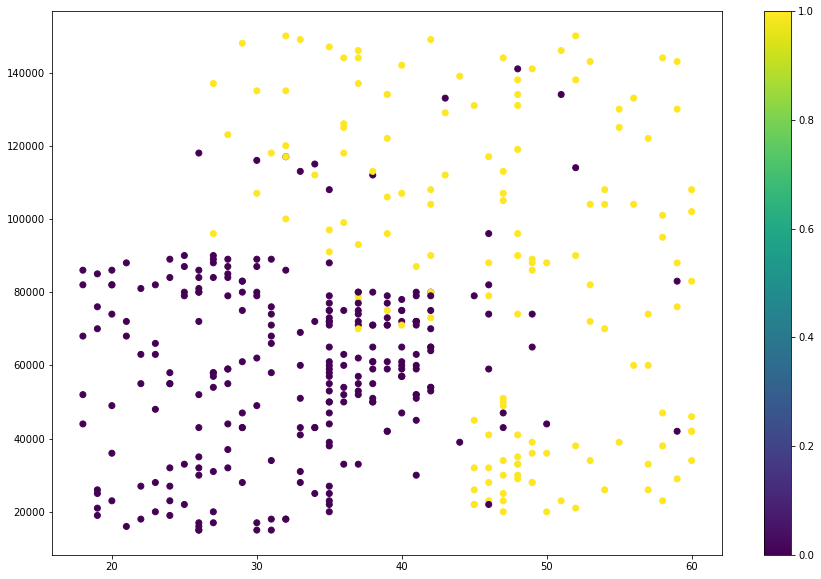

In [69]:
plt.figure(figsize=(15, 10))
plt.scatter(data['Age'],data['EstimatedSalary'],c=data['Purchased'])
plt.colorbar()

# Remplacement les lignes de la colonne Gender par des valeurs numérique 1                                 ou 2 (1 pour Mâle et 2 pour femme)

In [70]:
data['Gender'].replace(['Male','Female'],[1,2],inplace=True)

In [71]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,2,26,43000,0
3,15603246,2,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,2,46,41000,1
396,15706071,1,51,23000,1
397,15654296,2,50,20000,1
398,15755018,1,36,33000,0


# matrice de corrélation

<AxesSubplot:>

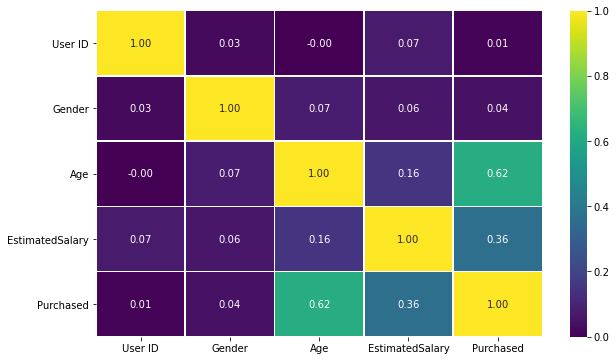

In [72]:
corrmat = data.corr()
plt.subplots(figsize=(10,6))
sns.heatmap(corrmat,annot=True,linewidth=0.5,fmt=".2f", cmap="viridis")

# Supprimer  les colonnes inutiles de dataset

In [73]:
data=data.drop(['User ID'],axis=1) #suppression la colonne User ID

In [74]:
data

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,2,26,43000,0
3,2,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,2,46,41000,1
396,1,51,23000,1
397,2,50,20000,1
398,1,36,33000,0


# Construction du modèle 

# Affecter à une variables X les Gender	Age	EstimatedSalary

In [75]:
x=data[['Gender','Age','EstimatedSalary']]

In [76]:
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,2,26,43000
3,2,27,57000
4,1,19,76000
...,...,...,...
395,2,46,41000
396,1,51,23000
397,2,50,20000
398,1,36,33000


# Affecter à une variable Y l'attribut Purchased

In [77]:
y=data[['Purchased']]

In [78]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


# Découpage le dataset en 2 données d’entraînements et données de tests

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

In [80]:
print('Train set: ',x_train.shape)
print('Test set: ',x_test.shape)   #360 lignes d'entraînement et 40 lignes pour tester notre modèle

Train set:  (360, 3)
Test set:  (40, 3)


# La courbe d’apprentissage 

D:\Nouveau dossier (2)\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Nouveau dossier (2)\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Nouveau dossier (2)\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Nouveau dossier (2)\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), 

D:\Nouveau dossier (2)\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Nouveau dossier (2)\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Nouveau dossier (2)\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Nouveau dossier (2)\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), 

D:\Nouveau dossier (2)\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Nouveau dossier (2)\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Nouveau dossier (2)\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Nouveau dossier (2)\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), 

D:\Nouveau dossier (2)\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Nouveau dossier (2)\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Nouveau dossier (2)\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Nouveau dossier (2)\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), 

D:\Nouveau dossier (2)\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Nouveau dossier (2)\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Nouveau dossier (2)\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Nouveau dossier (2)\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), 

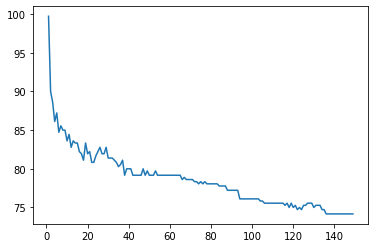

In [81]:
K=[]
Score = []
for i in range (1,150):
    K.append(i)
    model=KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train,y_train)
    Score.append(model.score(x_train,y_train)*100)
plt.plot(K,Score)


# Instancier le model

In [82]:
model = KNeighborsClassifier(n_neighbors=1)

# Entrainer votre modèle avec les paramètres x_train et y_train

In [83]:
model.fit(x_train,y_train)

D:\Nouveau dossier (2)\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [84]:
print('Coeff R2 =', model.score(x_train, y_train)) #calcule le coefficient de détermination

Coeff R2 = 0.9972222222222222


# La matrice de confusion

In [91]:
cm = confusion_matrix(model.predict(x_train),y_train)
print(cm)

[[232   1]
 [  0 127]]


# Test

In [97]:
y_pred = model.predict(x_test)

In [98]:
y_test

,Purchased
75,1
275,1
156,0
327,0
152,0
47,0
379,1
97,1
106,0
37,0


In [99]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# La matrice de confusion

In [100]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[24,  1],
       [ 7,  8]], dtype=int64)

# Accuracy

In [101]:
ac = accuracy_score(y_test, y_pred)
ac

0.8